In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\banav\Desktop\INTERNSHIP\data\reviews_data_dump_extracted\reviews_badminton\data.csv")

In [3]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
df.shape

(8518, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [6]:
#checking both null values
df[df['Review Title'].isnull() & df['Review text'].isnull()]

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [7]:
# droping both which are null
df.dropna(subset=['Review Title', 'Review text'], how='all', inplace=True)

In [8]:
df.isnull().sum()

Reviewer Name        2
Review Title         2
Place of Review     42
Up Votes             2
Down Votes           2
Month              457
Review text          0
Ratings              0
dtype: int64

In [9]:
#replacing null values in review title
df['Review Title'] = df['Review Title'].fillna("")

In [10]:
df['Review'] = df['Review text'] + ' ' + df['Review Title']

In [11]:
df['Rating'] = df['Ratings'].apply(lambda x: 'Negative' if x in [1, 2] else 'Positive')

In [12]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Review,Rating
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,"Nice product, good quality, but price is now r...",Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,They didn't supplied Yonex Mavis 350. Outside ...,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Worst product. Damaged shuttlecocks packed in ...,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,"Quite O. K. , but nowadays the quality of the...",Positive
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Over pricedJust â?¹620 ..from retailer.I didn'...,Negative


<Axes: xlabel='Rating', ylabel='count'>

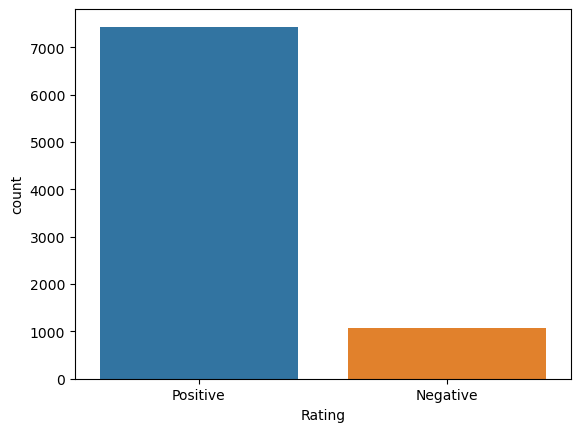

In [13]:
sns.countplot(x = 'Rating',data= df)

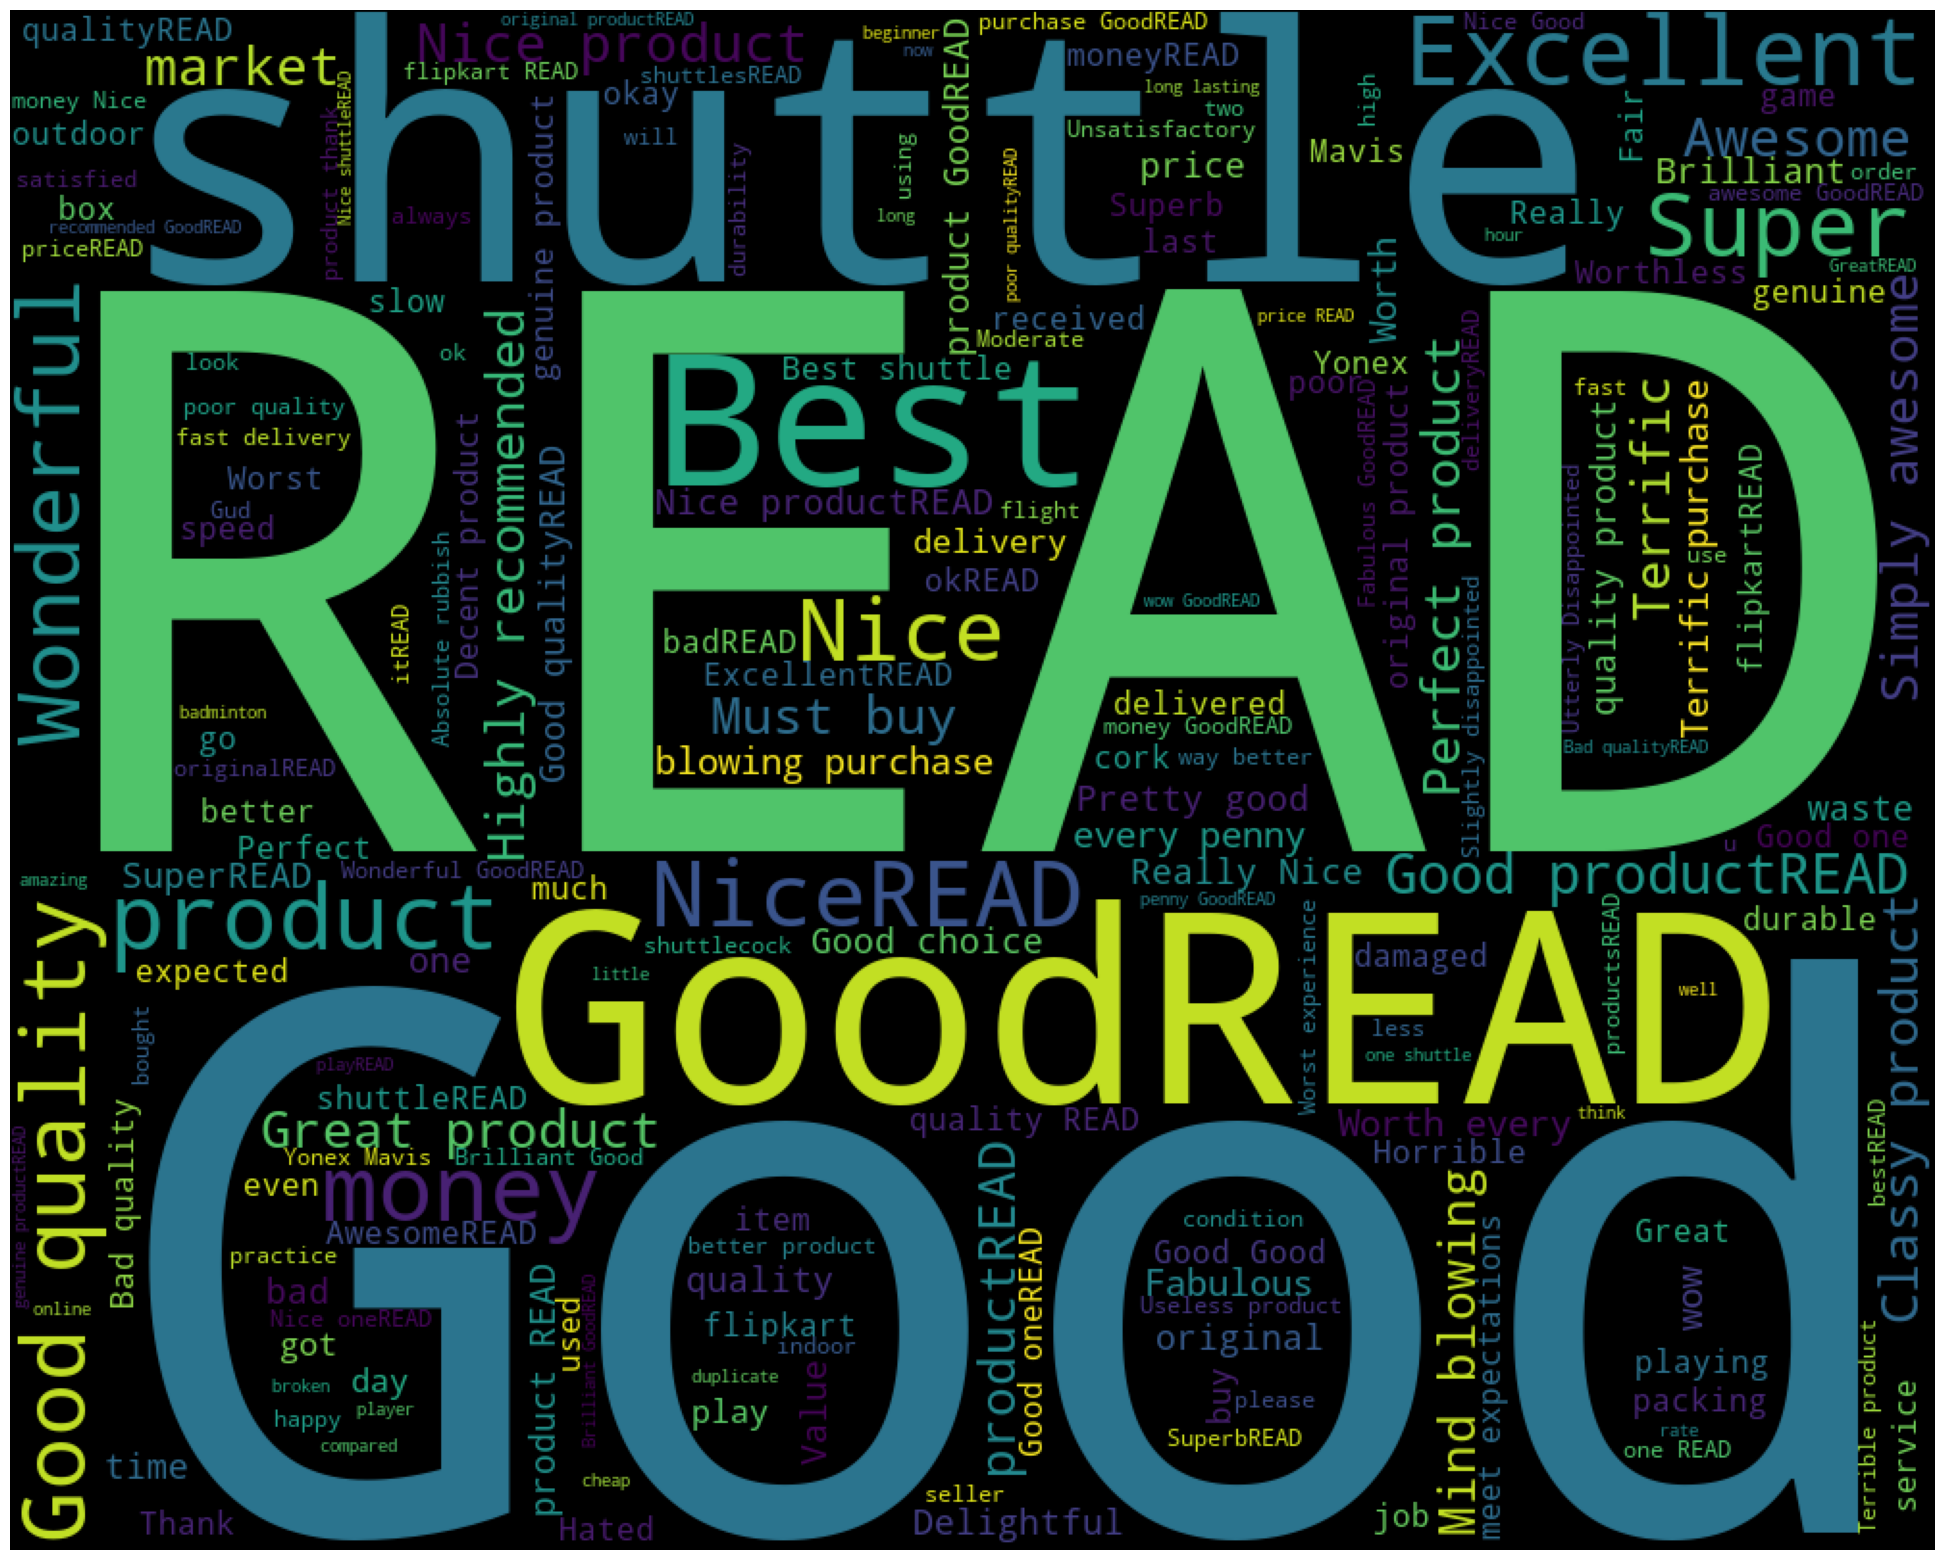

In [14]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1000,
               height=800).generate(' '.join(df['Review']))

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
X = df.Review
y = df.Rating

In [16]:
print(X.shape, y.shape)

(8510,) (8510,)


In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5957,) (5957,)
(2553,) (2553,)


In [18]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [19]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\banav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\banav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
def clean(doc):
    doc = doc.replace("</br>", " ")

    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [21]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: total: 6.75 s
Wall time: 8.21 s


In [22]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 1.98 s
Wall time: 2.24 s


In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [26]:
pip install mlflow

                                              0.0/19.7 MB ? eta -:--:--
                                             0.0/19.7 MB 991.0 kB/s eta 0:00:20
                                              0.2/19.7 MB 2.0 MB/s eta 0:00:10
                                              0.4/19.7 MB 3.3 MB/s eta 0:00:06
     -                                        0.8/19.7 MB 5.0 MB/s eta 0:00:04
     --                                       1.3/19.7 MB 6.4 MB/s eta 0:00:03
     ---                                      1.8/19.7 MB 7.3 MB/s eta 0:00:03
     ----                                     2.2/19.7 MB 7.8 MB/s eta 0:00:03
     -----                                    2.5/19.7 MB 7.3 MB/s eta 0:00:03
     -----                                    2.9/19.7 MB 7.3 MB/s eta 0:00:03
     ------                                   3.2/19.7 MB 7.2 MB/s eta 0:00:03
     -------                                  3.5/19.7 MB 7.2 MB/s eta 0:00:03
     -------                                  3.7/19.7 MB 


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import mlflow
mlflow.set_experiment("sentiment_analysis")

2024/03/29 13:04:36 INFO mlflow.tracking.fluent: Experiment with name 'sentiment_analysis' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/banav/Desktop/INTERNSHIP/ml_flow/mlruns/741706321559237835', creation_time=1711697676802, experiment_id='741706321559237835', last_update_time=1711697676802, lifecycle_stage='active', name='sentiment_analysis', tags={}>

In [28]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

In [29]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train_clean, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test_clean, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

********** naive_bayes **********


2024/03/29 13:04:55 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/03/29 13:04:55 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 19.3 s
Wall time: 47.8 s
Train Score:  0.9034746054018111
Test Score:  0.9052095573834704

********** decision_tree **********


2024/03/29 13:05:43 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 1min 6s
Wall time: 1min 43s
Train Score:  0.909349060909844
Test Score:  0.9044261652957305

********** logistic_regression **********


2024/03/29 13:07:27 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 12min 46s
Wall time: 13min 56s
Train Score:  0.8885365070241578
Test Score:  0.8871915393654524

